<div style="border:solid green 2px; padding: 20px">

<b>Привет, Маргарита!</b>

Меня зовут Ярослав П. и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Предлагаю общаться на «**ты**». Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на «**вы**».

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span><a class="tocSkip">

- Проект отлично выполнен.
- В проекте наглядная (но ее можно немного улучшить, оставил пару комментариев) визуализация и верные выводы по графикам.
- Пожалуйста, поработай над оформлением графиков - это важная часть любого аналитического отчета.
- Также часть кода, к сожалению, не работает. Проверь, пожалуйста, в чем дело.
    
### <span style="color:orange">Обратная связь (v2)</span><a class="tocSkip">

- Оставил пару примеров по графикам :)
    
### <span style="color:orange">Обратная связь (v3)</span><a class="tocSkip">

- Оставил пару еще пару комментариев и примеров в продолжение нашего разговора :)
    
### <span style="color:orange">Обратная связь (v4)</span><a class="tocSkip">

- Проект отлично доработан, спасибо за уделенное время!
    
Проект принят, успехов в дальнейшем обучении!

# Часть 1 
# Парсинг Данных

In [ ]:
# Напишите парсер для сбора с сайта данных о 11 крупнейших фестивалях 2018 года. 
# Сохраните данные в датафрейм festivals и выведите на экран.
import requests  
from bs4 import (
    BeautifulSoup, 
) 
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)
# print(req)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table')
# применим метод find к тегу table

heading_table = [] 
for row in table.find_all('th'): 
        heading_table.append(row.text) 

content=[] 
for row in table.find_all('tr'): 

    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])

import pandas as pd
festivals = pd.DataFrame(content, columns=heading_table)
print(festivals)

## Работа с базой данных

In [ ]:
# Изучите таблицу flights и подсчитайте количество вылетов (flight_id) 
# из каждого аэропорта вылета (departure_airport). Назовите переменную cnt_flights и 
# выведите её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. 
# Результат отсортируйте в порядке убывания количества вылетов.
SELECT 
   departure_airport,
   COUNT(flight_id) AS cnt_flights
    
FROM     
   flights

GROUP BY
   departure_airport
ORDER BY
    cnt_flights DESC;

In [ ]:
# Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. 
# Назовите получившийся столбец flights_amount и выведите его, также выведите столбец model
--SELECT
--    aircrafts.model AS model,
--    COUNT(flights.flight_id) AS flights_amount
--FROM
--    flights
--INNER JOIN aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
--WHERE
--    CAST(departure_time AS date) < '2018-10-01' AND
--    CAST(departure_time AS date) > '2018-08-01'
--GROUP BY 
--    model;
SELECT
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    flights
LEFT JOIN
    aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    CAST(departure_time AS date) < '2018-10-01' AND
    CAST(departure_time AS date) > '2018-08-31'
GROUP BY
    model

In [ ]:
# Посчитайте количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместите 
# в столбец type_aircraft, а количество рейсов — во flights_amount. Выведите их на экран
SELECT
   COUNT(flights.flight_id) AS flights_amount,
   CASE WHEN model LIKE 'Airbus%' THEN 'Airbus'
        WHEN model LIKE 'Boeing%' THEN 'Boeing'
        ELSE 'other'
        END AS type_aircraft
FROM
   flights
INNER JOIN
    aircrafts ON aircrafts.aircraft_code = flights.aircraft_code
WHERE
    CAST(departure_time AS date) BETWEEN '2018-09-01' AND '2018-09-30'
GROUP BY
    type_aircraft

In [ ]:
# Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. 
# Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
SELECT
    SUBQ.city,
    AVG(SUBQ.count_flights) as average_flights 
FROM
    (SELECT
        airports.city,
        EXTRACT(day from flights.arrival_time) as day_number,
        COUNT(flights.flight_id) as count_flights
    FROM
        flights
    LEFT JOIN
        airports ON airports.airport_code = flights.arrival_airport
    WHERE
        (flights.arrival_time :: date) BETWEEN '2018-08-01' AND '2018-08-31'
    GROUP BY
        airports.city, day_number) AS SUBQ
GROUP BY
    SUBQ.city;

In [ ]:
# Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. 
# Выведите название фестиваля festival_name и номер недели festival_week
SELECT
    festival_name,
    EXTRACT(WEEK FROM CAST(festival_date AS date)) AS festival_week
FROM
    festivals
WHERE
    festival_city = 'Москва' AND festival_date BETWEEN  '2018-07-23' AND '2018-09-30'

In [ ]:
# Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество
# билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). 
# Получите таблицу, в которой будет номер недели; информация о количестве купленных за неделю билетов; 
# номер недели ещё раз, если в эту неделю проходил фестиваль, 
# и nan, если не проходил; а также название фестиваля festival_name
SELECT 
    T.week_number,
    T.ticket_amount,
    T.festival_week,
    T.festival_name
FROM 
(
(SELECT
        EXTRACT (week FROM flights.departure_time) AS week_number,
        COUNT(ticket_flights.ticket_no) AS ticket_amount
    FROM
        airports
    INNER JOIN
        flights
    ON
        airports.airport_code = flights.arrival_airport
    INNER JOIN
        ticket_flights
    ON
        flights.flight_id = ticket_flights.flight_id
    WHERE
        airports.city = 'Москва'
        AND CAST(flights.departure_time AS date) BETWEEN '2018-07-23' AND '2018-09-30'
    GROUP BY
        week_number
) t
LEFT JOIN 
(SELECT
        festival_name,
        EXTRACT (week FROM festivals.festival_date) AS festival_week
    FROM
        festivals
    WHERE
        festival_city = 'Москва'
      AND CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' AND '2018-09-30'
) t2 
ON 
    t.week_number = t2.festival_week
) AS T

# Аналитика в авиакомпании

Получены файлы, в которых содержатся результаты запросов из предыдущих этапов проекта

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
 model — модели самолета
 flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
 city — городах
 average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года



Для этих двух наборов данных нужно:  
• импортировать файлы;  
• изучить данные в них;  
• проверить типы данных на корректность;
• выбрать топ-10 городов по количеству рейсов;
• построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
•с делать выводы по каждому из графиков, пояснить результат

## Изучим данные

In [1]:
# откроем нужные библиотеки 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
query_3 

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


переведем average_flights в должный формат int

In [7]:
# query_3['average_flights'] = query_3['average_flights'].astype('int')
# убираем)

In [8]:
# query_3

In [9]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [10]:
# Проверили на дубликаты, их нет
query_3.duplicated().sum()

0

Таблице в порядке, для расчета ам ни чего не мешает.


найдем top_10

In [11]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)
top10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


## Анализ данных

Найдем наиболее популярные модели самолетов, построив график количества рейсов по моделям самолета

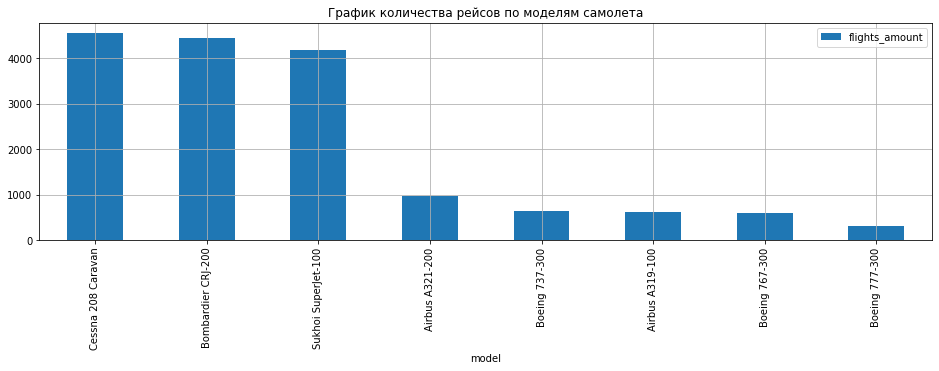

In [12]:
# Строим график количества рейсов по моделям самолета
plot_one = query_1.sort_values(by = 'flights_amount', ascending = False)
plot_one.plot(x='model', grid=True, kind='bar', figsize=(16, 4), title='График количества рейсов по моделям самолета')
plt.show()

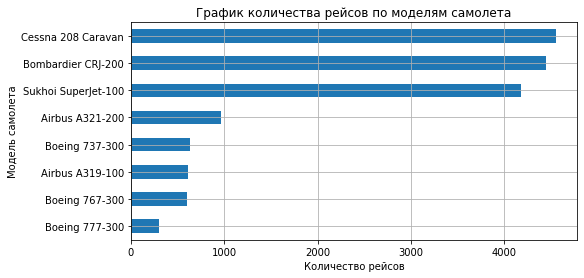

In [13]:
# Строим график количества рейсов по моделям самолета
plot_one = query_1.sort_values(by = 'flights_amount', ascending = True)
plot_one.plot(x='model', grid=True, kind='barh', figsize=(8, 4), legend=False)
plt.title('График количества рейсов по моделям самолета')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')
plt.show()

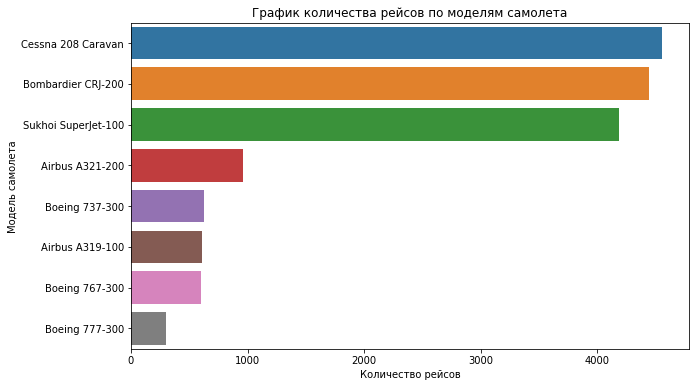

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='flights_amount', y='model', data=query_1.sort_values(by = 'flights_amount', ascending = False))
plt.title('График количества рейсов по моделям самолета')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета');

По графику видно, что оснавную часть рейсов выполняют самалеты моделей, Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.

Построим график количества рейсов по основным городам.

In [15]:
# Найдем количество рейсов из третьего запроса и удалим столбец со средним кол-ом рейсов
query_3['flights_amount'] = query_3['average_flights'] * 31
query_3['flights_amount'] = query_3['flights_amount'].astype('int', errors = 'ignore')
del query_3['average_flights']

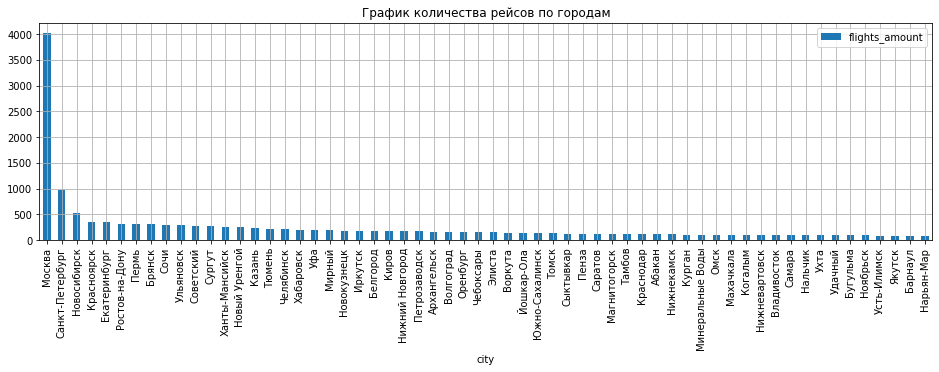

In [16]:
# Построим график количества рейсов по основным городам
plot_two = query_3.sort_values(by='flights_amount', ascending=False).head(60)
plot_two.plot(x='city', grid=True, kind='bar', figsize=(16, 4), title='График количества рейсов по городам')

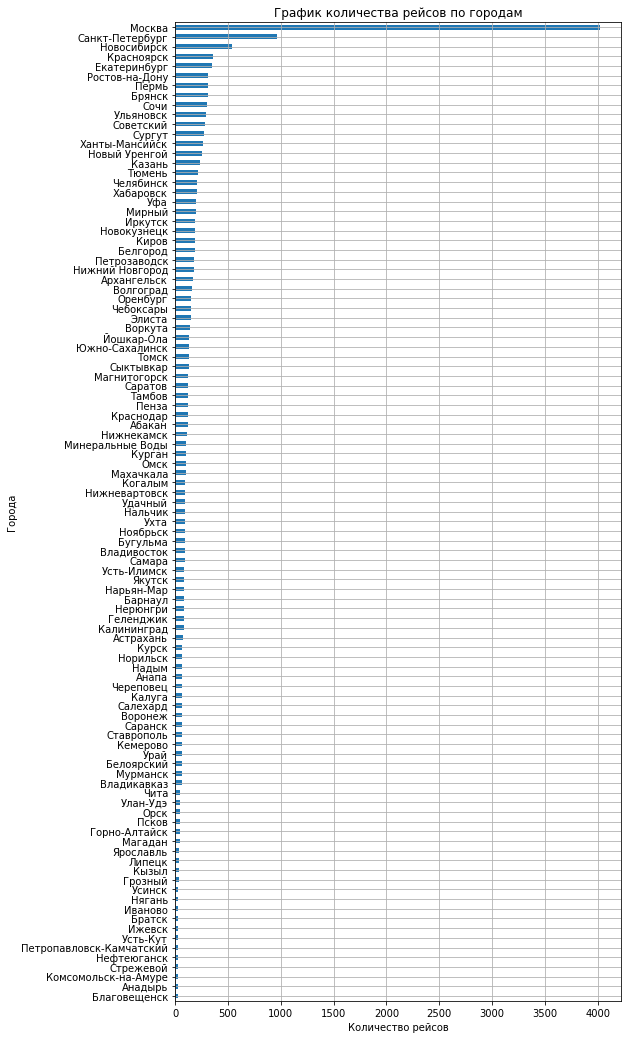

In [18]:
plot_two = query_3.sort_values(by = 'flights_amount', ascending = True)
plot_two.plot(x='city', grid=True, kind='barh', figsize=(8, 18), legend=False)
plt.title('График количества рейсов по городам')
plt.xlabel('Количество рейсов')
plt.ylabel('Города')
plt.show()

Видем, что большая часть полетов совершается в больших городах Москва, Санкт-Петербург.

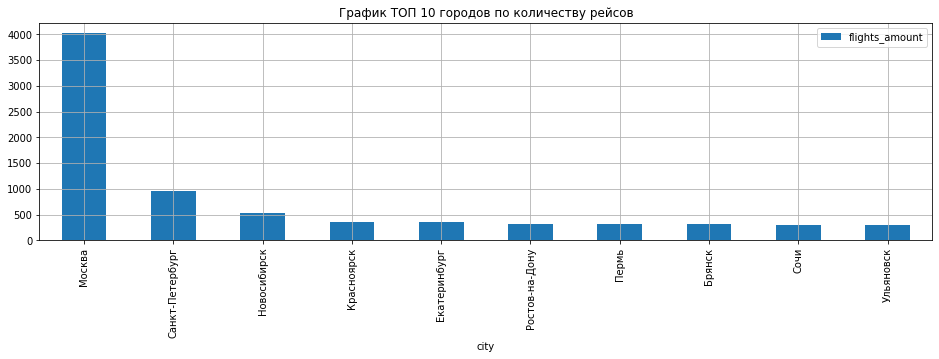

In [19]:
# Построим график ТОП 10 городов по количеству рейсов

plot_three = plot_two.sort_values(by='flights_amount', ascending=False).head(10)
plot_three.plot(x='city', grid=True, kind='bar', figsize=(16, 4), title='График ТОП 10 городов по количеству рейсов')

In [20]:
top10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


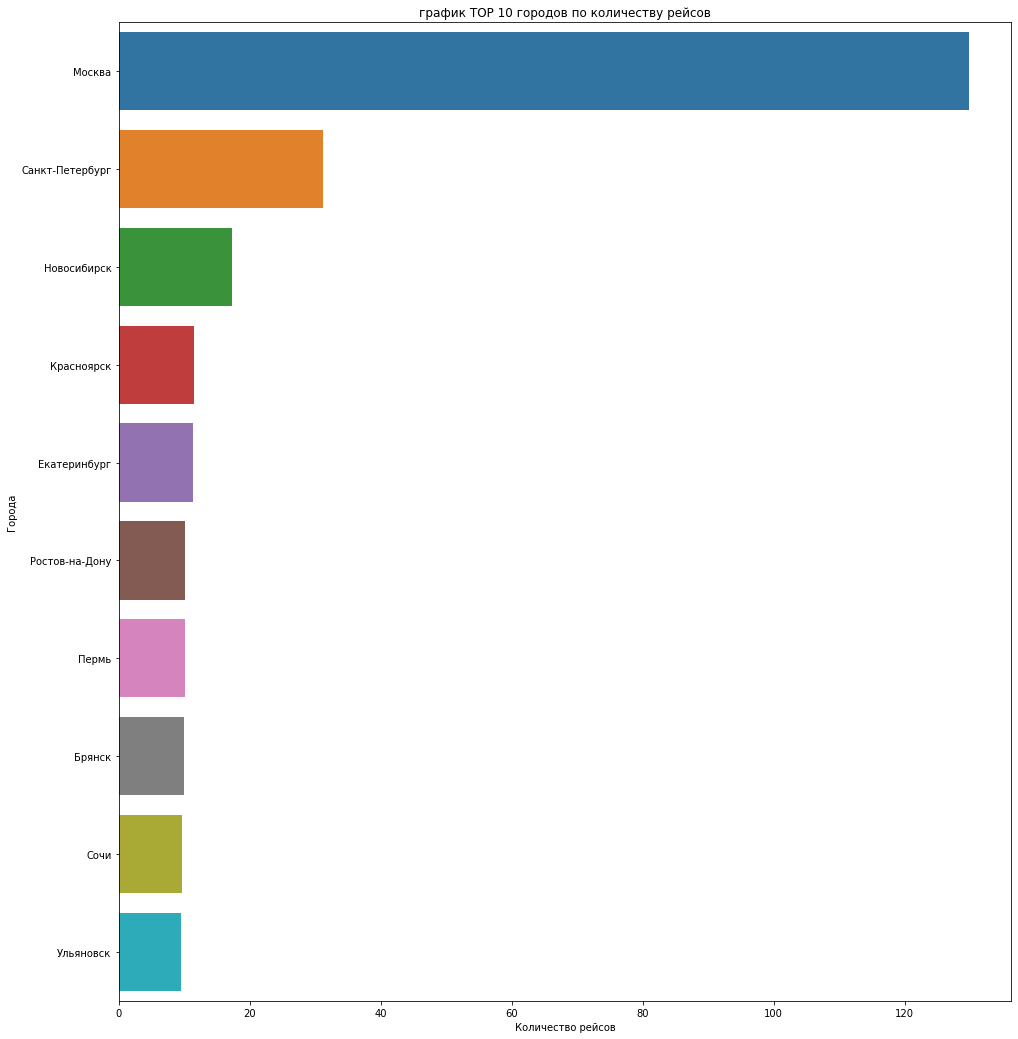

In [21]:
# Построим график ТОП 10 городов по количеству рейсов
plt.figure(figsize=(16, 18))
sns.barplot(x='average_flights', y='city', data=top10_cities.sort_values(by = 'average_flights', ascending = False))
plt.title('график TOP 10 городов по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Города');



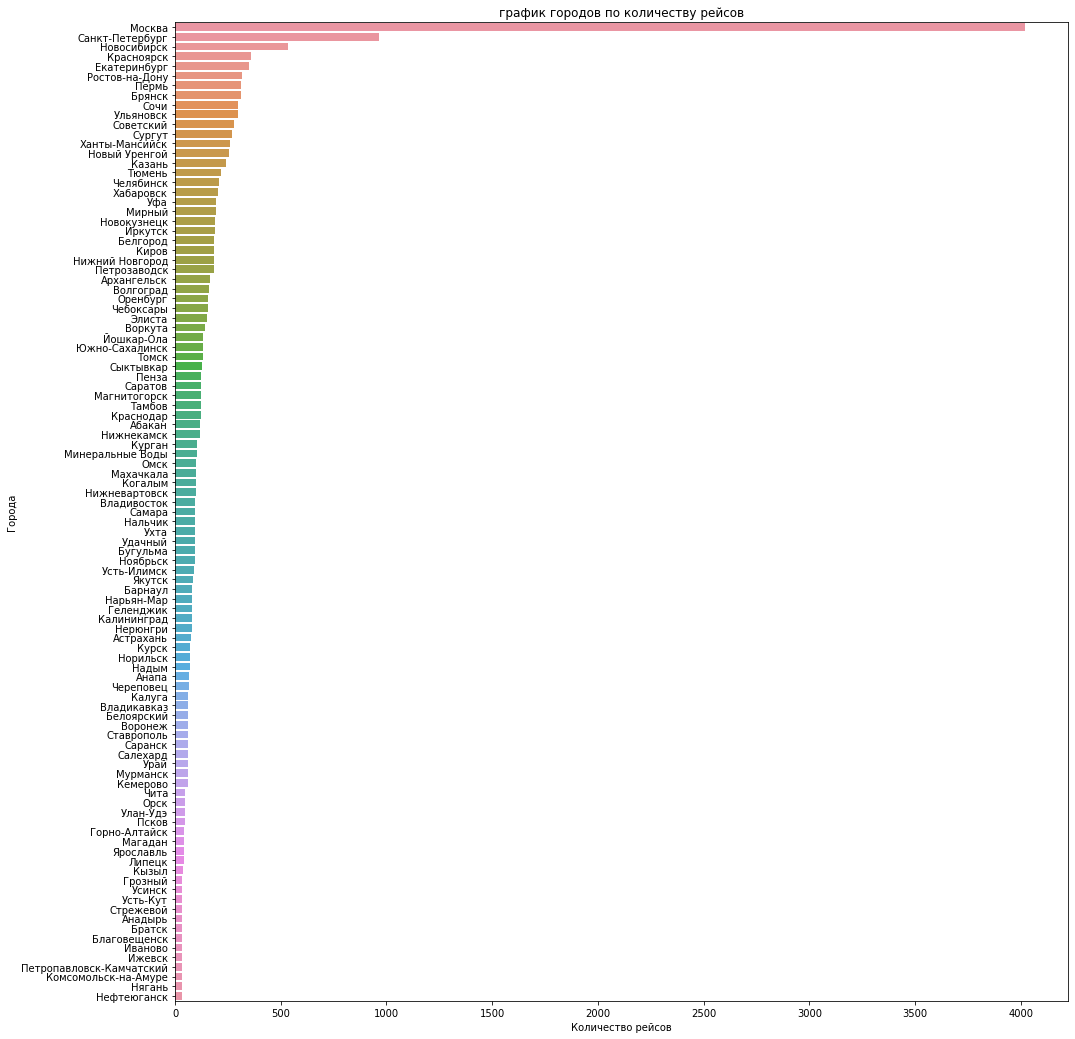

In [22]:
plt.figure(figsize=(16, 18))
sns.barplot(x='flights_amount', y='city', data=query_3.sort_values(by = 'flights_amount', ascending = False))
plt.title('график городов по количеству рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Города');

В крупных городах полетов больше, лидеры Москва, Санкт-Петербург, Новосибирск

## Общий вывод


Основную часть всех рейсов выполняется на 3-х моделях самолетов : Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100;
Первая тройка городов по количеству рейсов - Москва, Санкт-Петербург и Новосибирск.